In [379]:
import pandas as pd
import numpy as np
import pylab
from sklearn.svm import OneClassSVM
import matplotlib.pyplot as plt
pylab.rcParams.update({'font.size' : 14})

In [380]:
data = pd.read_csv('titanic_dataset.csv')

In [381]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 2. Make ‘PassengerId’ as the index column


In [382]:
data.set_index('PassengerId')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [383]:
#checking null values in the whole data set

data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [384]:
#Checking individual column for null values
print(data['Age'].isna().sum() , data['Cabin'].isna().sum() , data['Embarked'].isna().sum())


177 687 2


In [385]:
#checking the shape of the given dat set
data.shape

(891, 12)

In [386]:
#checking data types
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Fare'}>]], dtype=object)

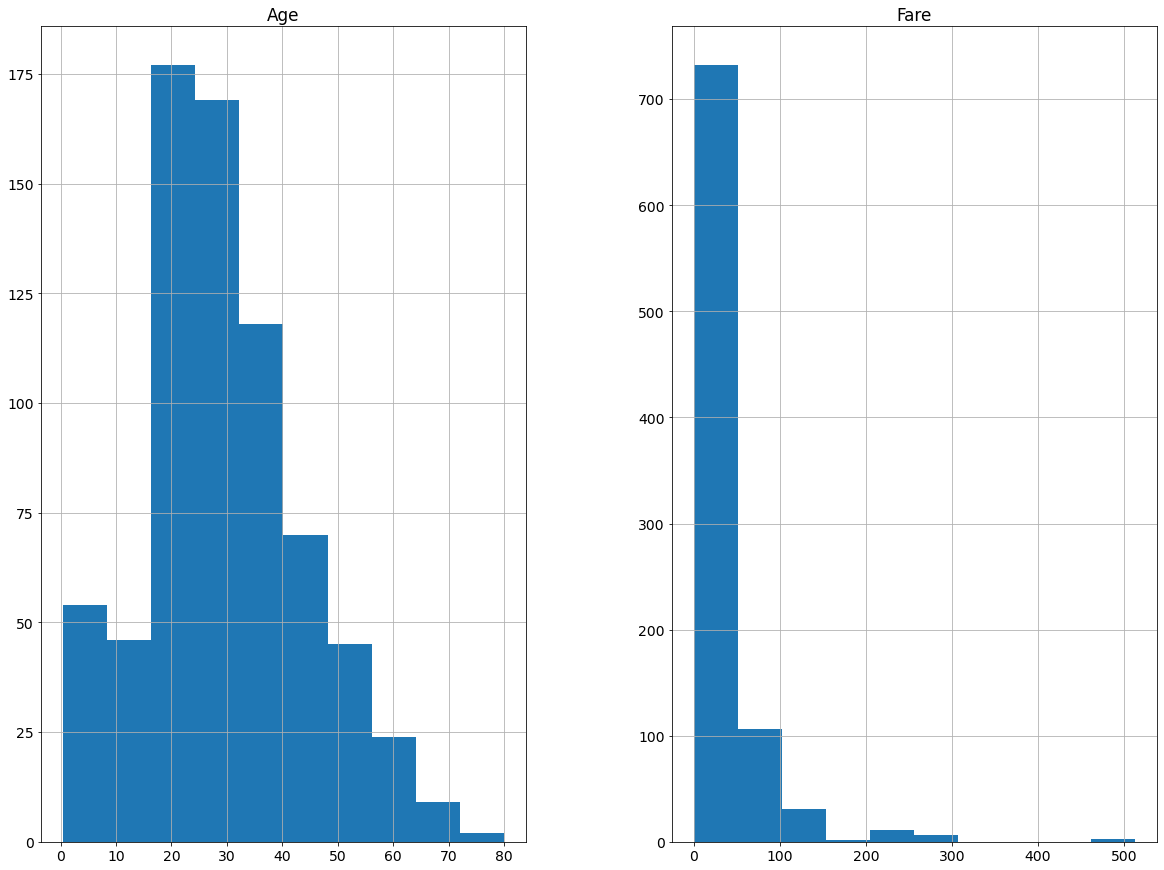

In [387]:
freqgraph = data.select_dtypes(include = ['float'])
freqgraph.hist(figsize = (20,15))
# HERE WE ARE CURRENTLY FOCUSSING ON THE AGE - SINCE IT HAS MISSING VALUES.
# OBSERVATION: POSITIVELY SKEWED (Right Skewed)
# This means that we have outliers on the increasing section of ages
# Therefore, we can fill any missing values with the median

In [388]:
data['Age'] = data['Age'].fillna(data['Age'].median())

In [389]:
data['Age'].isna().sum()

0

In [390]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [391]:
data['Cabin']

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [392]:
data.fillna(data['Cabin'].mode()[0], inplace=True)
# SInce the data in the column - Cabin is non numeric, we are using mode to fill the data for the missing values

In [393]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [394]:
import seaborn as sns

In [395]:
# CHecking UniVariate Outliers for 'Fare'

qv1 = data['Fare'].quantile(0.25)
qv2 = data['Fare'].quantile(0.50)
qv3 = data['Fare'].quantile(0.75)
qv_limit = 1.5*(qv3-qv1)

In [396]:
outmask = (data['Fare'] > qv3 + qv_limit) | (data['Fare'] < qv1 - qv_limit)
outdata = data['Fare'][outmask]

Text(0, 0.5, 'Fare')

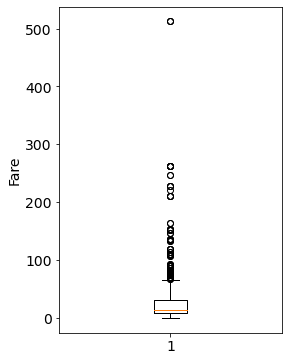

In [397]:

fig = pylab.figure(figsize=(4,6))
ax = fig.add_subplot(1,1,1)
ax.boxplot(data['Fare'])
ax.set_ylabel('Fare')

In [398]:
# CHecking UniVariate Outliers for 'Age'

qv1 = data['Age'].quantile(0.25)
qv2 = data['Age'].quantile(0.50)
qv3 = data['Age'].quantile(0.75)
qv_limit = 1.5*(qv3-qv1)

outmask = (data['Age'] > qv3 + qv_limit) | (data['Age'] < qv1 - qv_limit)
outdata = data['Age'][outmask]



Text(0, 0.5, 'Age')

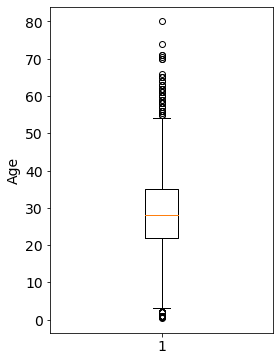

In [399]:
fig = pylab.figure(figsize=(4,6))
ax = fig.add_subplot(1,1,1)
ax.boxplot(data['Age'])
ax.set_ylabel('Age')


In [400]:
percentile25 = data['Age'].quantile(0.25)
percentile75 = data['Age'].quantile(0.75)

<Figure size 1152x360 with 0 Axes>

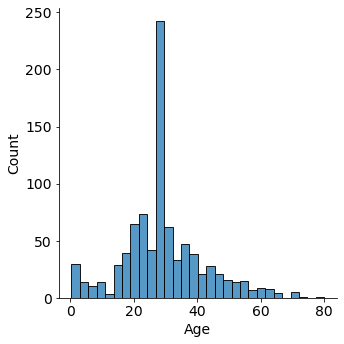

In [401]:
plt.figure(figsize=(16,5))
sns.displot(data['Age'])
plt.show()
# We can clearly see outliers in this plot for Age

<Figure size 1008x432 with 0 Axes>

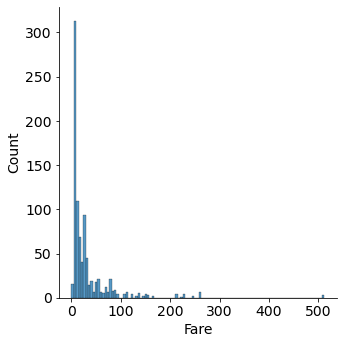

In [402]:
plt.figure(figsize=(14,6))
sns.displot(data['Fare'])
plt.show()
# We can clearly see outliers in this plot for Fare

In [403]:
# CHecking UniVariate Outliers for 'Fare'

qv1 = data['Age'].quantile(0.25)
qv2 = data['Age'].quantile(0.50)
qv3 = data['Age'].quantile(0.75)
qv_limit = 1.5*(qv3-qv1)
iqr = qv3-qv1

In [404]:
percentile25 = data['Age'].quantile(0.25)
percentile75 = data['Age'].quantile(0.75)

In [405]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [406]:
data['Age'] = data['Age'].clip(upper_limit,lower_limit)
# Clipping the outliers of the column - Age

Text(0, 0.5, 'Age')

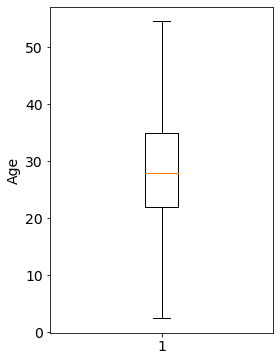

In [407]:

fig = pylab.figure(figsize=(4,6))
ax = fig.add_subplot(1,1,1)
ax.boxplot(data['Age'])
ax.set_ylabel('Age')

# We can see no more outliers in the Age column

Text(0, 0.5, 'Fare')

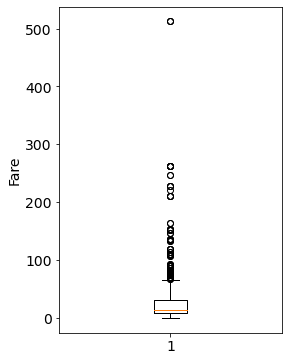

In [408]:

fig = pylab.figure(figsize=(4,6))
ax = fig.add_subplot(1,1,1)
ax.boxplot(data['Fare'])
ax.set_ylabel('Fare')

In [409]:
# CHecking UniVariate Outliers for 'Fare'

qv1 = data['Fare'].quantile(0.25)
qv2 = data['Fare'].quantile(0.50)
qv3 = data['Fare'].quantile(0.75)
qv_limit = 1.5*(qv3-qv1)
iqr = qv3-qv1

In [410]:
percentile25 = data['Fare'].quantile(0.25)
percentile75 = data['Fare'].quantile(0.75)

In [411]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [412]:
data['Fare'] = data['Fare'].clip(upper_limit,lower_limit)
# Clipping the outliers of the column - Fare

Text(0, 0.5, 'Fare')

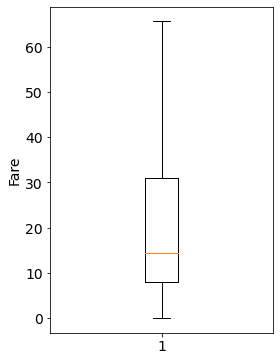

In [413]:
# No More Outliers for the column - Fare
fig = pylab.figure(figsize=(4,6))
ax = fig.add_subplot(1,1,1)
ax.boxplot(data['Fare'])
ax.set_ylabel('Fare')

In [414]:
survived = data.Survived

# MIN MAX SCALING

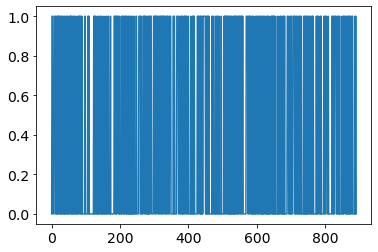

In [415]:
plt.plot(survived)

In [416]:
data[['Survived']].describe()

,Survived
count,891.000000
mean,0.383838
std,0.486592
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [417]:
survived_matrix = survived.values.reshape(-1,1)

from sklearn import preprocessing
from sklearn.preprocessing import scale

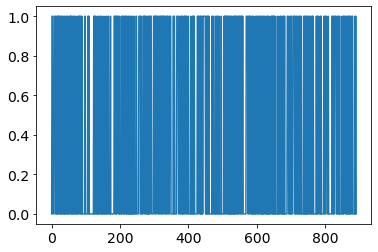

In [418]:
scaled = preprocessing.MinMaxScaler()
scaled_survived = scaled.fit_transform(survived_matrix)
plt.plot(scaled_survived)

# The scales are now between 0 and 1 

In [419]:
print(scaled_survived)

[[0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.